## Домашнее задание «Функции и работа с данными»

Необходимые импорты.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

### **Задание 1**
Напишите функцию, которая классифицирует фильмы из материалов занятия по правилам:

- оценка 2 и ниже — низкий рейтинг;
- оценка 4 и ниже — средний рейтинг;
- оценка 4.5 и 5 — высокий рейтинг.


Результат классификации запишите в столбец class.

**Загрузим датасеты**

In [2]:
df_films = pd.read_csv('./movies.csv')
df_ratings = pd.read_csv('./ratings.csv')

In [3]:
df_ratings.sample(5)

,userId,movieId,rating,timestamp
48289,353,44191,4.0,1157495888
1971,15,5989,2.5,1134521661
26756,195,4016,2.0,978700114
6569,36,315,5.0,847056984
57023,412,337,2.0,993088545


In [4]:
df_films.sample(5)

,movieId,title,genres
1305,1641,"Full Monty, The (1997)",Comedy|Drama
2116,2642,Superman III (1983),Action|Adventure|Sci-Fi
7799,86644,"Fast Five (Fast and the Furious 5, The) (2011)",Action|Crime|Drama|Thriller|IMAX
5596,8910,I Heart Huckabees (2004),Comedy
4319,5803,I Spy (2002),Action|Adventure|Comedy|Crime


**Объединим датасеты**

In [5]:
df_films_rating = df_films.merge(df_ratings, on=['movieId'])

In [6]:
df_films_rating.sample(5)

,movieId,title,genres,userId,rating,timestamp
44474,2023,"Godfather: Part III, The (1990)",Crime|Drama|Mystery|Thriller,509,3.0,939325726
28761,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,198,2.0,1068823363
34683,1343,Cape Fear (1991),Thriller,177,3.0,907380964
13891,457,"Fugitive, The (1993)",Thriller,235,5.0,1111625394
28654,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,463,4.0,1049913012


**Функция для классификации рейтинга**

In [7]:
def df_rate_classification(rating):
    """Функция классификации рейтинга

    Args:
        rating (float): значение рейтинга

    Returns:
        str: класс рейтинга
    """    
        
    match rating:
        case rating if rating >= 4.5:
            return 'High rate'
        case rating if 2 < rating <= 4:
            return 'Middle rate'
        case rating if rating <= 2:
            return 'Low rate'
  

**Применим функцию к столбцу rating**

In [8]:
df_films_rating['Class'] = df_films_rating['rating'].apply(df_rate_classification)

In [9]:
df_films_rating.sample(5)

,movieId,title,genres,userId,rating,timestamp,Class
8645,293,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,561,4.0,1172696171,Middle rate
51847,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,141,4.0,949293609,Middle rate
13773,454,"Firm, The (1993)",Drama|Thriller,659,4.0,855588743,Middle rate
1408,24,Powder (1995),Drama|Sci-Fi,348,2.0,960838511,Low rate
75662,5570,Thesis (Tesis) (1996),Drama|Horror|Thriller,262,2.5,1433902476,Middle rate


### **Задание 2**
Используйте файл keywords.csv.

Нужно написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определённому региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

```python
geo_data = {
            'Центр': ['москва', 'тула', 'ярославль'],
            'Северо-Запад': ['петербург', 'псков', 'мурманск'],
            'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
            }
```

Результат классификации запишите в отдельный столбец region.

Словарь для классификации региона

In [10]:
geo_data = {
            'Центр': ['москва', 'тула', 'ярославль'],
            'Северо-Запад': ['петербург', 'псков', 'мурманск'],
            'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
            }

Загрузим датасет

In [11]:
df_kewords = pd.read_csv('./keywords.csv')

In [12]:
df_kewords.sample(5)

,keyword,shows
21605,лучшие советские фильмы,14877
93497,смотреть катю и макса,4888
28742,черви играть бесплатно,11257
68565,ведьма фильм 2016,6751
35679,александр невзоров,11538


Создадим функцию для классификации запроса по первому найденному названию города в строке запроса

In [13]:
def geo_classify(query_str: str):
    """Функция для классификации региона запроса по первому найденному слову
        в словаре регионов

    Args:
        query_str (str): строка запроса

    Returns:
        str: строка с названием региона или 'undefined'
    """
    word_list = [word for word in str.lower(query_str).split(' ')]

    for word in word_list:
        region = next((k for k, v in geo_data.items() if word in v), 'Undefined')
        if region != 'Undefined':
           break
    
    return region

Применим функцию к столбцу 'keyword' датасета

In [14]:
df_kewords['region'] = df_kewords['keyword'].apply(geo_classify)

In [15]:
df_kewords[df_kewords['region'] != 'Undefined'].sample(10)

,keyword,shows,region
14785,авито ру москва,19985,Центр
71274,техносила ярославль каталог товаров,5023,Центр
54672,авито авто с пробегом санкт петербург,9564,Северо-Запад
19220,emls недвижимость санкт петербург,15911,Северо-Запад
77904,мосцветторг официальный сайт москва,4506,Центр
56348,прогноз погоды москва,7469,Центр
87300,центр занятости мурманск вакансии официальный ...,4189,Северо-Запад
23871,леруа мерлен тула,13931,Центр
26748,аксон ярославль интернет магазин,12024,Центр
19120,avto ru москва,15992,Центр


In [16]:
df_kewords[df_kewords['region'] == 'Undefined'].sample(10)

,keyword,shows,region
59077,schokk,5904,Undefined
72298,солигорск,4903,Undefined
40689,суперсемейка 2,8263,Undefined
998,мамба знакомства,202002,Undefined
93152,фитнес браслет xiaomi mi band 2,4012,Undefined
2638,футбол юа,102001,Undefined
13372,закуски на праздничный стол рецепты с фото,21624,Undefined
68198,записи,5171,Undefined
84111,с крещением господним поздравление,21840,Undefined
68380,формула кино чертаново,5228,Undefined


### **Задание 3 (бонусное)**

Есть мнение, что раньше снимали настоящее кино, не то что сейчас. Ваша задача — проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия: файл movies.csv и ratings.csv из базы. Нужно проверить, верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

Вы не будете затрагивать субьективные факторы выставления этих рейтингов, а пройдётесь по алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010 года.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте алгоритм:

1. для каждой строки пройдите по всем годам списка years;
2. если номер года присутствует в названии фильма, то функция возвращает этот год, как год выпуска;
3. если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год.
4. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’.

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга.

Создадим список годов производства

In [ ]:
years = [i for i in range(1950, 2011)]

Загрузим датасеты и объединим их

In [27]:
df_films = pd.read_csv('./movies.csv')
df_ratings = pd.read_csv('./ratings.csv')

df_films_rating = df_films.merge(df_ratings, on=['movieId'])

In [41]:
df_films_rating.sample(5)

,movieId,title,genres,userId,rating,timestamp
18913,608,Fargo (1996),Comedy|Crime|Drama|Thriller,292,4.5,1140051073
35209,1370,Die Hard 2 (1990),Action|Adventure|Thriller,390,3.0,867076211
79403,6724,Paper Moon (1973),Comedy|Crime|Drama,547,4.5,1199390748
20311,736,Twister (1996),Action|Adventure|Romance|Thriller,119,2.0,913232716
84695,8984,Ocean's Twelve (2004),Action|Comedy|Crime|Thriller,478,4.5,1446830502


Функция определения года производства фильма

In [81]:
def production_year(title):
    """Функция определения года выпуска фильма из его названия

    Args:
        title (str): Название фильма с годом выпуска

    Returns:
        int: Год производства, если неопределен, возвращается 1900
    """
    for year in years:
        if str(year) in title:
            return year
    return 1900

Применим функцию к стобцу датасета

In [77]:
df_films_rating['year'] = df_films_rating['title'].apply(production_year)
df_films_rating.sample(10)

,movieId,title,genres,userId,rating,timestamp,year
35037,1358,Sling Blade (1996),Drama,143,4.0,1149650028,1996
21066,780,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller,430,2.5,1172908200,1996
45720,2101,Squanto: A Warrior's Tale (1994),Adventure|Drama,510,1.0,952327949,1994
9261,314,"Secret of Roan Inish, The (1994)",Children|Drama|Fantasy|Mystery,326,5.0,966009951,1994
39126,1641,"Full Monty, The (1997)",Comedy|Drama,658,3.0,941488339,1997
46647,2150,"Gods Must Be Crazy, The (1980)",Adventure|Comedy,232,5.0,955090383,1980
82464,7990,Rock 'N' Roll High School (1979),Comedy|Musical,648,3.0,1138479051,1979
27380,1130,"Howling, The (1980)",Horror|Mystery,57,4.0,907765142,1980
90770,55442,Persepolis (2007),Animation|Drama,132,5.0,1283419466,2007
90973,56174,I Am Legend (2007),Action|Horror|Sci-Fi|Thriller|IMAX,94,2.5,1291780610,2007


Найдем срений рейтинг для каждого года производства фильмов

In [76]:
avg_rate_by_year = df_films_rating.groupby('year')['rating'].mean().reset_index()
avg_rate_by_year.sort_values(by='rating', ascending=False, inplace=True)
avg_rate_by_year

,year,rating
8,1957,4.014241
23,1972,4.011136
3,1952,4.000000
5,1954,3.994220
2,1951,3.983539
...,...,...
56,2005,3.448434
54,2003,3.444777
47,1996,3.426600
48,1997,3.415764


Можно построить график, из которого видно, что хотя рейтинг и снижался со второй половины ХХ-го века до начала ХХI, однако в первом десятилетии ХХI-го века тенденция изменилась.

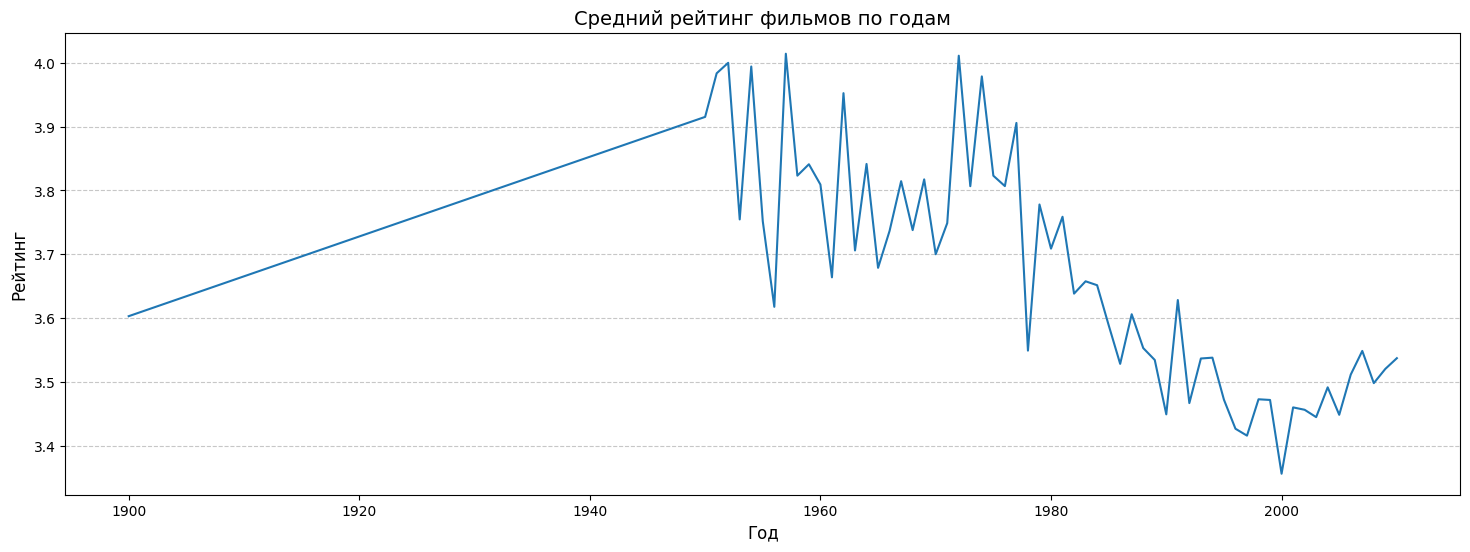

In [ ]:
avg_rate_by_year = df_films_rating.groupby('year')['rating'].mean().reset_index()

plt.figure(figsize=(18, 6))
plt.plot(avg_rate_by_year['year'], avg_rate_by_year['rating'])
plt.xlabel('Год', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
plt.title('Средний рейтинг фильмов по годам', fontsize=14)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [82]:
avg_rate_by_year

,year,rating
0,1900,3.602960
1,1950,3.915254
2,1951,3.983539
3,1952,4.000000
4,1953,3.754587
...,...,...
57,2006,3.511478
58,2007,3.548538
59,2008,3.498057
60,2009,3.520378
